In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [75]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 49958 files for prediction set


In [76]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64), final_shorten_factor=2)

In [4]:
sonufy.build_model(filters=(16,32,64))

In [111]:
sonufy.train(mel_directory='data/mels', epochs=30, train_test_split=.02, batch_size=128)

Found 50241 files for training set
Found 1026 files for testing set
Epoch 1/30
392/392 [==============================] - 148s 375ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 2/30
392/392 [==============================] - 133s 338ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 3/30
392/392 [==============================] - 130s 331ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 4/30
392/392 [==============================] - 126s 321ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 5/30
392/392 [==============================] - 124s 316ms/step - loss: 0.0044 - val_loss: 0.0048
Epoch 6/30
392/392 [==============================] - 125s 320ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/30
392/392 [==============================] - 127s 323ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/30
392/392 [==============================] - 125s 319ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 9/30
392/392 [==============================] - 134s 340ms/step - loss: 0.0043 - val_loss: 0.0

KeyboardInterrupt: 

In [112]:
sonufy.save_encoder('data/test_128dim_newmels')
# sonufy.load_encoder('data/test_128dim_newmels')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_newmels')

2022-09-06 16:33:29.383 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-06 16:33:29.698 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpiqju2tll/assets
2022-09-06 16:33:30.735690: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-06 16:33:30.735890: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-06 16:33:30.737183: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpiqju2tll
2022-09-06 16:33:30.741266: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-06 16:33:30.741273: I tens

Encoder saved to "data/test_128dim_newmels".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 53883 / 53883

2.67 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.1 minutes elapsed
Building genre distributions...
[============================================================>] 53883 / 53883

Genre distributions built. 0.32 minutes elapsed
Latent Space Built.


2022-09-06 16:36:40.268 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 10). These functions will not be directly callable after loading.
2022-09-06 16:36:41.053 INFO    tensorflow: Assets written to: data/test_128dim_newmels/assets


Model saved to "data/test_128dim_newmels".
saved full model


2022-09-06 16:36:41.970 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-06 16:36:42.161 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpjthcawew/assets
2022-09-06 16:36:43.051456: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-06 16:36:43.051481: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-06 16:36:43.051604: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpjthcawew
2022-09-06 16:36:43.055241: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-06 16:36:43.055266: I tens

Encoder saved to "data/test_128dim_newmels".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_128dim_newmels.


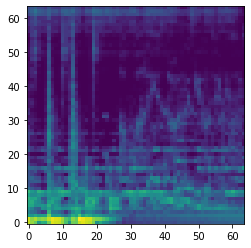

In [113]:
test_img = adg.take(3)[0]

plt.imshow(test_img[0], origin='lower')

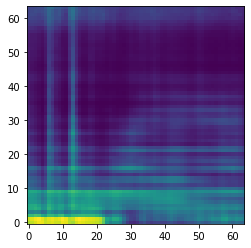

In [114]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')

In [115]:
a, b, c, d = sonufy.search_for_recommendations(query='beautiful and dangerous desmond dekker', get_time_and_freq=True)

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [116]:
a['name']

'Beautiful and Dangerous'

In [117]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,EAST CROYDON feat. James Maddren,spotify:track:350BnjEWhEBFeY5djjWmXq,Petter Eldh,0.521634,27,0.596679,0.503324
1,Southland,spotify:track:7Ib06lFizxlVPznTItb8Ca,Lindsay Lou,0.519166,39,0.720778,0.441406
2,Almost Fantasy,spotify:track:5lOuVGcqKeyc80RaIRs0p8,Fog Lake,0.507706,39,0.554174,0.494673
3,Mississippi Steamboat,spotify:track:26IxTOzwgq8Xpe1tPJw1lR,Ekoostik Hookah,0.506959,20,0.641059,0.460866
4,Kaçıyorum (feat. Gaye Su Akyol),spotify:track:3yT7bm0SdnRluI4cxHPEe7,Debruit,0.496249,22,0.492604,0.504138
5,Drumming In Africa - Soukouss,spotify:track:5Z0Hpt4RL2o6JlCsE94kG4,Soukouss Ta: African Drums and Music,0.495554,12,0.620575,0.452950
6,Part 3,spotify:track:14o3h5jwg5U3Wa3mY7dOx9,Douglas Holmquist,0.494404,21,0.558606,0.472491
7,Back in the Goodle Days,spotify:track:0B6BeEUd6UwFlbsHMQKjob,John Hartford,0.492001,43,0.596071,0.456061
8,The House of the Rising Sun,spotify:track:22UqKaSfXbivrK2PDQzNJk,Pozo Seco Singers,0.474109,19,0.663367,0.399176
9,Life's A Little Blue,spotify:track:3Rayx79t9q4nTO2xzdO8IE,Booker Little,0.473242,16,0.683665,0.383972


In [118]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

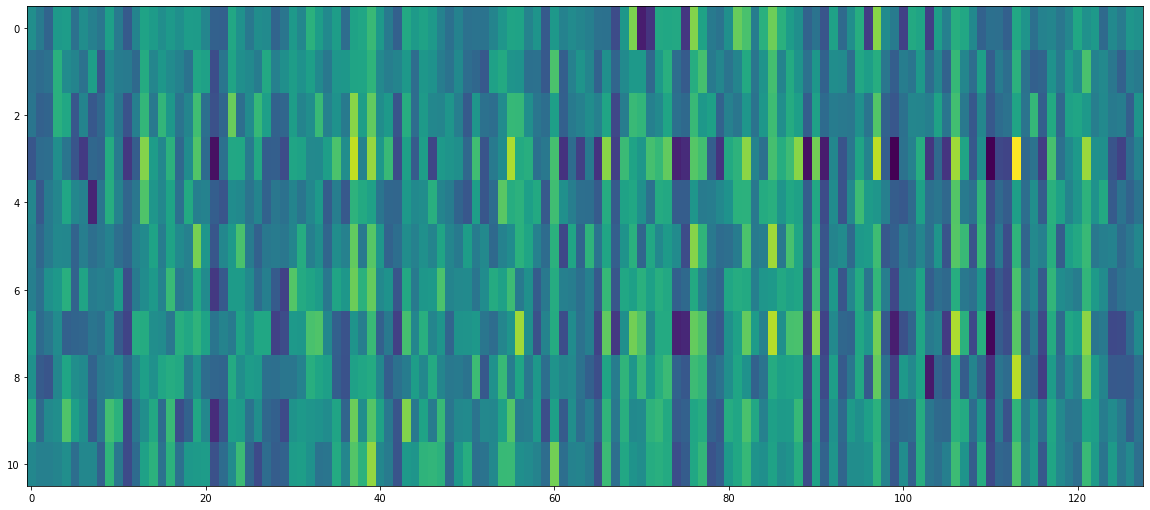

In [119]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.008464583422193032